In [9]:
import pandas as pd

# set pandas options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 20)


In [10]:
df = pd.read_json('data/guanaco_train.json', lines=True)

print(df['lang'].value_counts())

# sort by 'confidence'
df.sort_values(by=['confidence'], inplace=True, ascending=True)

df.head(10)

spa_Latn    3661
eng_Latn    3444
rus_Cyrl     715
deu_Latn     336
zho_Hans     319
            ... 
nob_Latn       1
kaz_Cyrl       1
fur_Latn       1
scn_Latn       1
yue_Hant       1
Name: lang, Length: 58, dtype: int64


,text,lang,confidence,id
8466,"### Human: Make a realistic sample dictionary of people in Python. The key should be a random 16-character hex string, and the value should be a dictionary of: `names` (a tuple), `surname`, `gende...",gle_Latn,0.058898,8466
277,### Human: write code in python to buy and sell stocks using macd crossover strategy### Assistant: Here's a sample code in Python that implements a MACD crossover strategy to buy and sell stocks:\...,eng_Latn,0.071322,277
1812,"### Human: Can you please write me small code snippet for React functional component, that has two divs and each div have multiple items inside of them, source of items is an Array, also each item...",nno_Latn,0.071897,1812
3126,### Human: Podrías decirme como crear una interfaz sencilla (también conocida como gui) de una calculadora para el lenguaje de programación Python? intenta encontrar un código que sirva tanto para...,swe_Latn,0.072641,3126
7309,### Human: Cómo puedo hacer unas luces inteligentes con las ws2812b utilizando un Esp8266### Assistant: En primer lugar necesitaras varios componentes:\n* NodeMcu ESP8266 cp2102\n* Tira led de WS2...,eng_Latn,0.073850,7309
2965,"### Human: Programa un script en python para hacer una API básica### Assistant: Aquí tienes el script: \n# api.py\nimport flask\nfrom flask import Flask, request, jsonify\nfrom flask_restful impor...",ita_Latn,0.075736,2965
1484,"### Human: genera un script en python para conectar a un websocket y enviar un json### Assistant: import websocket\nimport json\n\ndef on_message(ws, message):\n print(""Recibido mensaje: "", mes...",ita_Latn,0.076224,1484
1397,"### Human: 用JS编写归并排序函数### Assistant: /**\n * \n 归并排序\n归并排序（MERGE-SORT）是利用归并的思想实现的排序方法，\n该算法采用经典的分治（divide-and-conquer）策略\n（分治法将问题分(divide)成一些小的问题然后递归求解，\n而治(conquer)的阶段则将分的阶段得到的各答案""修补""在一起，即分而治之)。\...",wol_Latn,0.076314,1397
7953,"### Human: Extract the most important phrases and information from this noisy caption:\n\nea?, 678 — 264. Scrophnlariaceae, 681 — 265. Lentibulariaceae mQ Alliance L. Campanaks. Order 266. Campanu...",slk_Latn,0.082305,7953
5300,"### Human: Convert this Smali-code to Java-code:\n\n.class public interface abstract Landroid/hidl/base/V1_0/IBase;\n.super Ljava/lang/Object;\n.source ""IBase.java""\n\n# interfaces\n.implements La...",nld_Latn,0.084517,5300


In [22]:
# for items with confidence < 0.5, set 'lang' to 'unknown'
df.loc[df['confidence'] < 0.65, 'lang'] = 'unknown'
print(df['lang'].unique())
print(len(df['lang'].unique()))

# for langs that occur less than 10 times, set 'lang' to 'other'
lang_counts = df['lang'].value_counts()
print(lang_counts[lang_counts < 10])
df.loc[df['lang'].isin(lang_counts[lang_counts < 10].index), 'lang'] = 'other'

['unknown' 'spa_Latn' 'rus_Cyrl' 'eng_Latn' 'ast_Latn' 'arz_Arab'
 'zho_Hant' 'ltg_Latn' 'zho_Hans' 'deu_Latn' 'tha_Thai' 'fra_Latn'
 'eus_Latn' 'grn_Latn' 'por_Latn' 'ita_Latn' 'srd_Latn' 'ary_Arab'
 'dan_Latn' 'glg_Latn' 'cat_Latn' 'zsm_Latn' 'jpn_Jpan' 'arb_Arab'
 'pol_Latn' 'ind_Latn' 'tur_Latn' 'ces_Latn' 'ukr_Cyrl' 'kor_Hang'
 'fin_Latn' 'hun_Latn' 'vie_Latn']
33
tur_Latn    9
ast_Latn    5
arb_Arab    5
kor_Hang    5
grn_Latn    4
zsm_Latn    3
ary_Arab    3
ind_Latn    3
fin_Latn    2
srd_Latn    2
glg_Latn    2
ces_Latn    1
ltg_Latn    1
arz_Arab    1
Name: lang, dtype: int64


In [23]:
df[df['lang'] == 'eng_Latn']['confidence'].describe()

count    3303.000000
mean        0.976072
std         0.050695
min         0.656284
25%         0.982489
50%         0.994011
75%         0.997696
max         0.999991
Name: confidence, dtype: float64

In [24]:
df[df['lang'] == 'spa_Latn']['confidence'].describe()

count    3606.000000
mean        0.986765
std         0.038765
min         0.652839
25%         0.993967
50%         0.998345
75%         0.999382
max         1.000005
Name: confidence, dtype: float64

In [25]:
df[df['lang'] == 'rus_Cyrl'].sort_values(by=['confidence'], ascending=True)

,text,lang,confidence,id
4632,"### Human: Hello, AI!### Assistant: Hi, user!### Human: Для Вас - Юзер Юзерович.### Assistant: Здравствуйте, Юзер Юзерович. Чем я могу вам помочь?",rus_Cyrl,0.655936,4632
7918,"### Human: Пожалуйста, пошагово вычисли производную данной математической функции, для написания которой используется LaTeX:\n`$\frac{1}{2\sin^2{(2x-4\ln5)}}$`### Assistant: Конечная производная д...",rus_Cyrl,0.776063,7918
3230,### Human: Назови крупнейшие 5 городов России.### Assistant: Вот список пяти крупнейших городов России (по данным переписи 2020 года) с указанием численности населения в миллионах жителей:\n1. Мос...,rus_Cyrl,0.812339,3230
8627,### Human: Напиши топ-5 самых трудновыговариваемых географических названия### Assistant: Вот возможный список из пяти самых трудновыговариваемых географических названий:\n1. Тауматафакатангихангак...,rus_Cyrl,0.818217,8627
441,"### Human: За что кукушка хвалит петуха?### Assistant: Кукушка хвалит петуха за то, что хвалит он кукушку.\n\nЭто отрывок из басни А.А. Крылова ""Кукушка и Петух"".",rus_Cyrl,0.847352,441
...,...,...,...,...
6372,"### Human: Я подозреваю, что в семье моих соседей происходят случаи домашнего насилия. Что мне делать?### Assistant: Если у вас есть подозрения, что в семье ваших соседей происходят случаи домашне...",rus_Cyrl,0.999921,6372
8086,"### Human: Меня выбесил заказчик, я очень хочу ответить вежливо, но у меня горит с его вопросов. Перепиши, пожалуйста, моё письмо так, чтобы оно звучало вежливо и клиент не обиделся.\nПривет, Женё...",rus_Cyrl,0.999931,8086
4208,"### Human: Я планирую вложить все свои деньги в криптовалюту. Как ты считаешь, хорошая ли это идея?### Assistant: Инвестирование в криптовалюту является рискованным и сопряжено с высокой динамикой...",rus_Cyrl,0.999946,4208
2090,"### Human: Что делать если выхода нет?### Assistant: Ситуации, когда кажется, что выхода нет, могут быть очень трудными и вызывать чувство беспомощности и отчаяния. Однако, важно помнить, что всег...",rus_Cyrl,0.999950,2090


(0.0, 300.0)

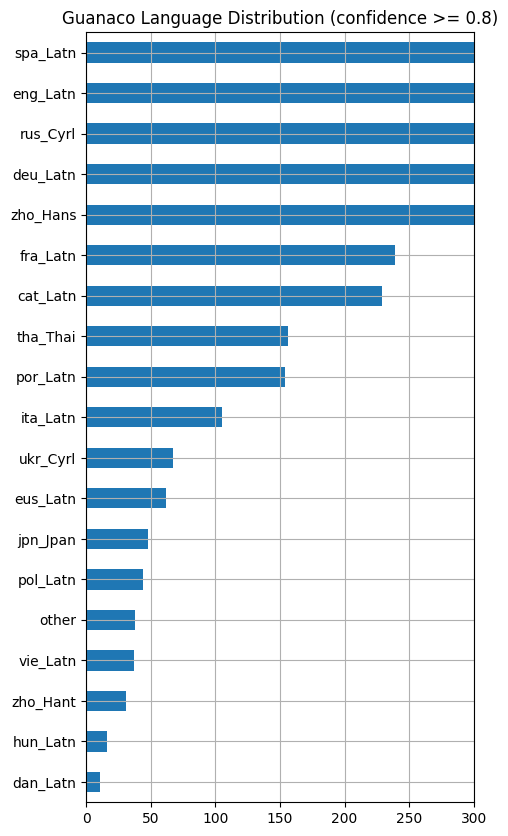

In [26]:

ax = df[df['confidence'] >= 0.8]['lang'].value_counts(ascending=True).plot(kind='barh', figsize=(5, 10), grid=True)
ax.set_title('Guanaco Language Distribution (confidence >= 0.8)')
ax.set_xlim([0, 300])

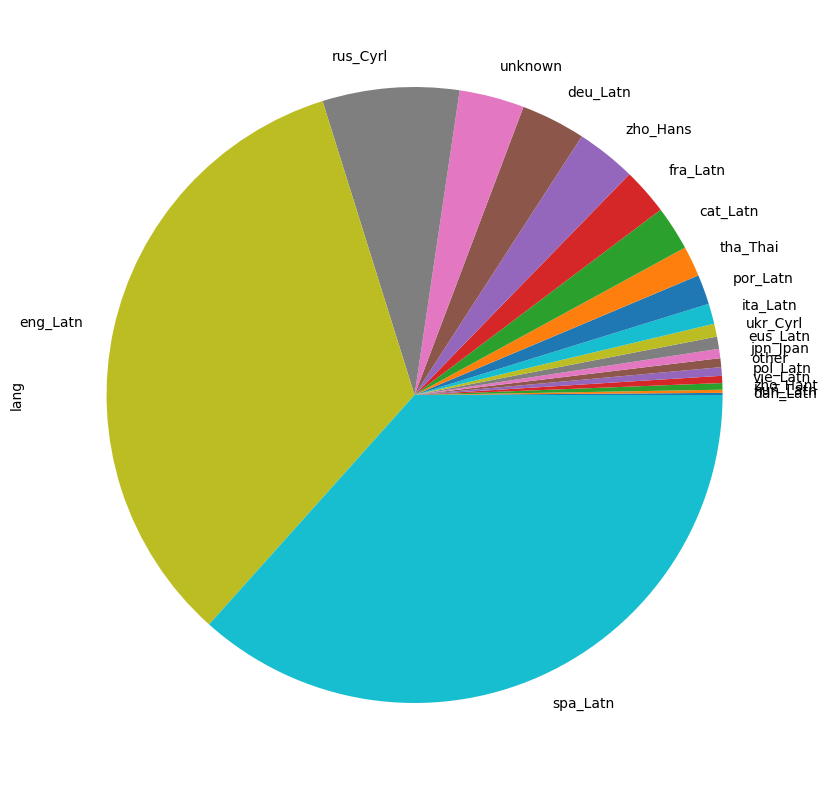

In [27]:
# plot pie chart
ax = df['lang'].value_counts(ascending=True).plot(kind='pie', figsize=(10, 10), grid=True)


In [7]:
mono = pd.read_json('data/guanaco_train_mono.json', lines=True)
mono.head()

,text,lang,confidence,id
0,"### Human: What is the best way to run a bash script periodically on ubuntu?### Assistant: There are several ways to run a bash script periodically on Ubuntu, but one of the most common methods is...",en,0.927603,3142
1,### Human: What are some things that should be taken in account when designing software that uses actuators and sensors to regulate airflow and pressure generated by multiple income and exhaust fa...,en,0.987088,6186
2,"### Human: I want to play Tic Tac Toe. I will start with the square in the middle. You will respond with your move.### Assistant: Let's play! You're X, and I'm O. Here's the current state of the b...",en,0.851605,9576
3,### Human: I am thinking about changing my college major to computer science. What kinds of jobs would that lead too?### Assistant: Computer Science is a broad field that offers a variety of job o...,en,0.880628,8539
4,"### Human: Do you think that ""Free Will"" conflicts with what we now know about the brain from neuroscience?### Assistant: There is ongoing debate among neuroscientists and philosophers about the r...",en,0.998107,9662


In [8]:

mono_ids = set(mono['id'].tolist())
diffs = None
for lang in ['ru', 'es', 'ca', 'de', 'fr', 'zh']:
    ml6 = pd.read_json(f'data/guanaco_train_{lang}.json', lines=True)
    ml6 = ml6[ml6['lang'] == 'en']
    # ml6.head()
    common_ids = mono_ids.intersection(ml6['id'].tolist())
    # get ids not in common
    diff_ids = mono_ids.difference(set(ml6['id'].tolist()))
    if diffs is None:
        diffs = diff_ids
    elif diffs != diff_ids:
        print('WARNING: diff_ids not the same!')
    
    print(lang, len(common_ids), len(diff_ids))

ru 2200 1000
es 2200 1000
ca 2200 1000
de 2200 1000
fr 2200 1000
zh 2200 1000


In [47]:
to_translate = mono[mono['id'].isin(diffs)]
print(len(to_translate))
# to_translate.to_json('data/guanaco_train_mono_1k_en.json', orient='records', lines=True, force_ascii=False)

1000
